In [ ]:
import numpy as np
import pandas as pd
from flask import Flask, request, jsonify
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import hashlib
import math
import joblib  # Import joblib untuk menyimpan model

In [ ]:
# Inisialisasi Flask
app = Flask(__name__) # Change _name_ to __name__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
import numpy as np
import pandas as pd
from pathlib import Path
# Membaca dataset dari file CSV
PATH_TO_DATA = Path('/content/drive/MyDrive/ML/Blockchain')

df  = pd.read_csv(PATH_TO_DATA / 'dataset.csv')
# df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

# Memastikan kolom yang diperlukan ada dalam dataset
if not all(col in df.columns for col in ["voter_id", "candidate_id", "vote_time", "label"]):
    raise ValueError("CSV file must contain columns: 'voter_id', 'candidate_id', 'vote_time', 'label'")

In [ ]:
# Split data menjadi fitur dan label
X = df[["voter_id", "candidate_id", "vote_time"]].values  # Fitur
y = df["label"].values  # Label

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Melatih model machine learning (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

In [ ]:
# Menghitung akurasi dan metrik evaluasi lainnya
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print("Akurasi Model: ", accuracy)
print("Laporan Klasifikasi:\n", class_report)

Akurasi Model:  0.9466666666666667
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       142
           1       1.00      0.00      0.00         8

    accuracy                           0.95       150
   macro avg       0.97      0.50      0.49       150
weighted avg       0.95      0.95      0.92       150



In [ ]:
# Menyimpan model ke dalam file menggunakan joblib
joblib.dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

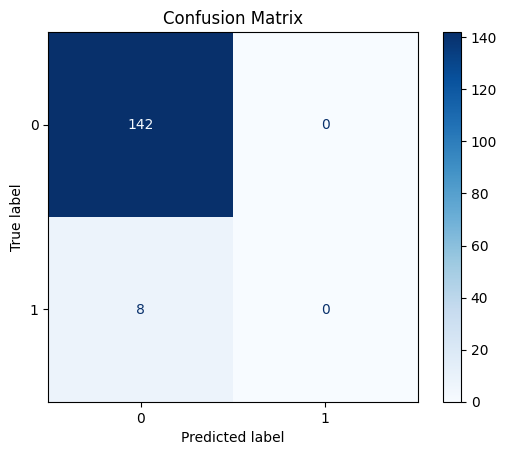

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


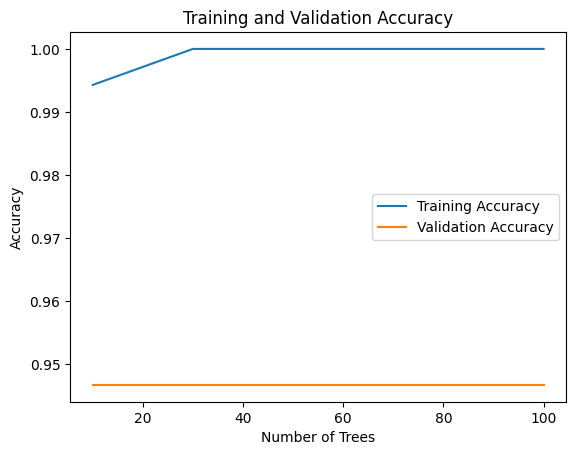

In [ ]:
import matplotlib.pyplot as plt

# Membuat model ulang untuk tracking training dan validation accuracy
train_accuracies = []
val_accuracies = []

# Loop untuk pelacakan accuracy
for n_trees in range(10, 110, 10):  # Menambah jumlah pohon secara bertahap
    model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    model.fit(X_train, y_train)

    # Akurasi training
    train_acc = accuracy_score(y_train, model.predict(X_train))
    train_accuracies.append(train_acc)

    # Akurasi validation
    val_acc = accuracy_score(y_test, model.predict(X_test))
    val_accuracies.append(val_acc)

# Plot Training dan Validation Accuracy
plt.plot(range(10, 110, 10), train_accuracies, label='Training Accuracy')
plt.plot(range(10, 110, 10), val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


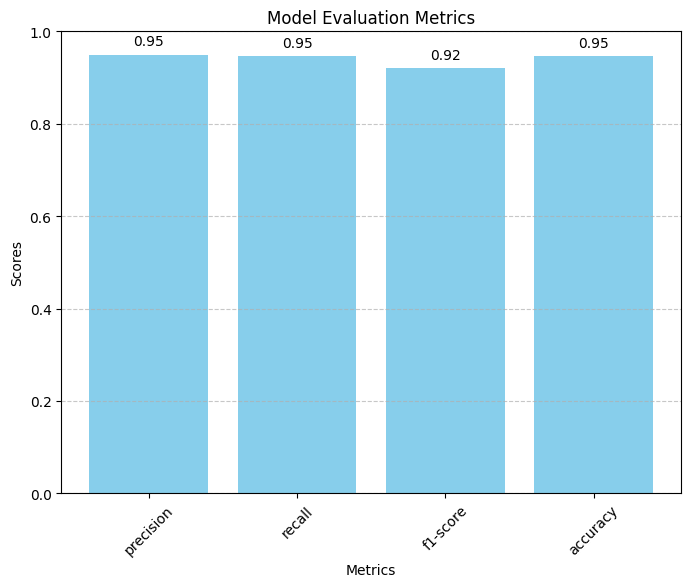

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Mendapatkan laporan klasifikasi dalam bentuk dictionary
class_report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Ekstraksi metrik evaluasi (Average / Total)
metrics = ['precision', 'recall', 'f1-score', 'accuracy']
values = [
    class_report_dict['weighted avg']['precision'],
    class_report_dict['weighted avg']['recall'],
    class_report_dict['weighted avg']['f1-score'],
    accuracy  # Akurasi sudah dihitung sebelumnya
]

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='skyblue')
plt.ylim(0, 1)  # Batas y dari 0 ke 1 karena metrik dalam rentang tersebut
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai di atas setiap bar
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.show()
